In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

D:\Anaconda3\envs\imperial\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\envs\imperial\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Anaconda3\envs\imperial\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def plot_pca(file):
  features = pd.read_csv(file).to_numpy()[:, 2:]

  pca = PCA(n_components = 2)
  components = pca.fit_transform(features)
  print('explained variance: ', pca.explained_variance_ratio_)
  plt.scatter(components[:, 0], components[:, 1])
  plt.show()

explained variance:  [1.00000000e+00 3.37884119e-18]


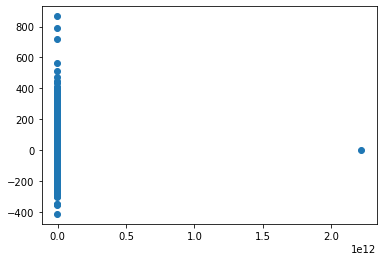

In [3]:
plot_pca('./processed_data/rdkit_descriptors.csv')

### Because I've witnessed this one components explaining all variance, Im wondering if the accuracy of random forest could be improved by using the component as in put feature

In [5]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/rdkit_descriptors.csv' ,'e_iso_pi')
rf = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8591 +- 0.0106
mean RMSE: 24.5307 +- 0.6909
mean MAE: 15.8197 +- 0.4874



In [7]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/rdkit_descriptors.csv' ,'e_iso_pi')
rf = train_rf_model(X, y, n_components=2, use_pca=True)


Beginning training loop...
Fraction of variance retained is: 1.0
Fraction of variance retained is: 1.0
Fraction of variance retained is: 1.0
Fraction of variance retained is: 1.0
Fraction of variance retained is: 1.0
Fraction of variance retained is: 0.9999999997480618
Fraction of variance retained is: 1.0
Fraction of variance retained is: 0.9999999997500862
Fraction of variance retained is: 0.999999999749487
Fraction of variance retained is: 1.0

mean R^2: 0.6500 +- 0.0125
mean RMSE: 39.0686 +- 1.2639
mean MAE: 27.5328 +- 0.6884

